# Using data to predict Car Insurance claims

## Executive Summary

The intention of this project was to see if I could predict the likelihood of someone having to make a claim on their car insurance based off of a number of features such as the age, gender and the price of their policy at the start/ point of renewal. As a young person who has to pay extortionate rates for car insurance, I have always wondered what makes car insurance companies fearful of insuring young people. Within this report I aim to answer this question.

The hypothesis I made prior to any data preperation is that younger people that have a powerful car are more likely to have to make a claim within their policy dates than those that are older. According to research, the number of no claims bonus years is also a contributing factor to a lower policy. As a result I am interested to see whether that affects a persons likelihood to make a claim against their insurance.

In [1]:
# Importing typical packages I use for data manipulation
import pandas as pd
import numpy as np


In [2]:
# Importing packages I have previously used to create graphs
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preperation

My data is sourced from a publicly available dataset on Kaggle and is titled '3-Year Non-Life Motor Insurance Analysis'. The dataset can be found [here](https://www.kaggle.com/code/jocelyndumlao/3-year-non-life-motor-insurance-analysis/input). The reason I selected this dataset is because it allowed me to track whether a claim had been made against a policy along side alot of useful data points that I could use when modelling.

The feature variables I am interested in are:

*ID

*Date_last_renewal

*Date_birth

*Date_driving_licence

*N_claims_year

*N_claims_history

*Area

*Power

I have decided to select these feature variables as they are associated with both the driver of the vehicle and the power of the car being insured. The target variable is 'N_claims_year' as a measure of if they claimed within that year or not.

In [ ]:
#Read in data

delimeter = ';'

df = pd.read_csv('Motor vehicle insurance data.csv', delimeter)

In [4]:
#Select columns I am interested in

car_df = df[['ID','Date_last_renewal','Date_birth','Date_driving_licence','N_claims_year','N_claims_history','Area','Power']]

In [5]:
print(car_df.head())

   ID Date_last_renewal  Date_birth Date_driving_licence  N_claims_year  \
0   1        05/11/2015  15/04/1956           20/03/1976              0   
1   1        05/11/2016  15/04/1956           20/03/1976              0   
2   1        05/11/2017  15/04/1956           20/03/1976              0   
3   1        05/11/2018  15/04/1956           20/03/1976              0   
4   2        26/09/2017  15/04/1956           20/03/1976              0   

   N_claims_history  Area  Power  
0                 0     0     80  
1                 0     0     80  
2                 0     0     80  
3                 0     0     80  
4                 0     0     80  


## Data Manipulation

I had to perform some data manipulation steps to gain access to features I am interested in such as age. These steps are evidenced in the next few commands.

In [ ]:
#Find the year of license start and date of birth
car_df['birth_year'] = car_df['Date_birth'].str.split('/').str[2]
car_df['renewal_year'] = car_df['Date_last_renewal'].str.split('/').str[2]
car_df['licence_year'] = car_df['Date_driving_licence'].str.split('/').str[2]

In [ ]:
#Cast new columns as integer type
car_df['birth_year'] = car_df['birth_year'].astype(int)
car_df['renewal_year'] = car_df['renewal_year'].astype(int)
car_df['licence_year'] = car_df['licence_year'].astype(int)

In [ ]:
#Find age of person and licence
car_df['age'] = 2024 - car_df['birth_year']
car_df['licence_age'] = 2024 - car_df['licence_year']

In [9]:
#Find latest input from each person so data is most up to date
max = car_df.groupby('ID')['renewal_year'].idxmax()
car_df = car_df.loc[max]

In [10]:
#Find whether they have made a claim or not, 1 being yes and 0 being no
car_df['claim'] = np.where(car_df['N_claims_year']== 0, 0, 1)

In [11]:
#Drop unnecessary columns now data manipulation is done
car_df = car_df.drop(['Date_last_renewal','Date_birth','Date_driving_licence','birth_year','renewal_year','licence_year','N_claims_year'], axis=1)

## Data checks

In [12]:
#Descriptive statistics for every feature
print(car_df.describe())

                 ID  N_claims_history          Area         Power  \
count  53502.000000      53502.000000  53502.000000  53502.000000   
mean   26751.500000          2.608706      0.272999     93.302718   
std    15444.841388          3.828327      0.445505     37.268660   
min        1.000000          0.000000      0.000000      0.000000   
25%    13376.250000          0.000000      0.000000     75.000000   
50%    26751.500000          1.000000      0.000000     90.000000   
75%    40126.750000          4.000000      1.000000    110.000000   
max    53502.000000         52.000000      1.000000    580.000000   

                age   licence_age         claim  
count  53502.000000  53502.000000  53502.000000  
mean      53.734440     31.067736      0.111211  
std       12.776602     12.527114      0.314396  
min       24.000000      6.000000      0.000000  
25%       44.000000     21.000000      0.000000  
50%       53.000000     30.000000      0.000000  
75%       63.000000     40.0

In [13]:
#Check for any nulls
car_df.isnull().sum()

ID                  0
N_claims_history    0
Area                0
Power               0
age                 0
licence_age         0
claim               0
dtype: int64

In [14]:
#Final dataframe prior to analysis
car_df

,ID,N_claims_history,Area,Power,age,licence_age,claim
3,1,0,0,80,68,48,0
5,2,0,0,80,68,48,0
9,3,0,0,85,49,29,0
12,4,0,0,6,51,31,0
14,5,0,0,6,51,31,0
...,...,...,...,...,...,...,...
105550,53498,0,0,110,43,17,0
105551,53499,0,0,129,48,7,0
105552,53500,0,0,55,50,13,0
105553,53501,0,0,90,78,42,0


## Analysis

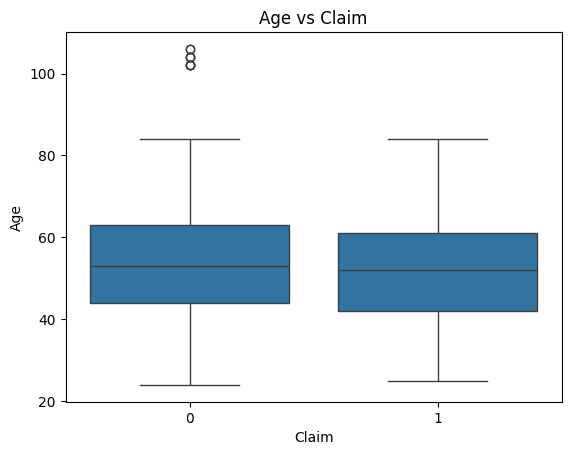

In [15]:
#Making a boxplot to visualise age in comparison to whether or not a claim was made 
sns.boxplot(x='claim', y='age', data=car_df)
plt.title('Age vs Claim')
plt.xlabel('Claim')
plt.ylabel('Age')
plt.show()

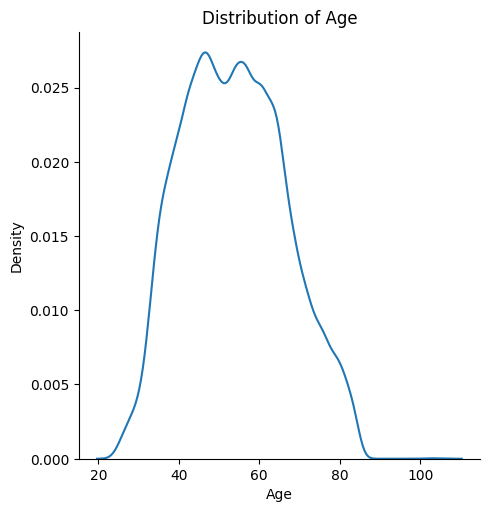

In [16]:
#Creating a distribtuion plot to understand the spread of age within the dataset
sns.displot(data=car_df, x="age",kind="kde")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='N_claims_history', ylabel='age'>

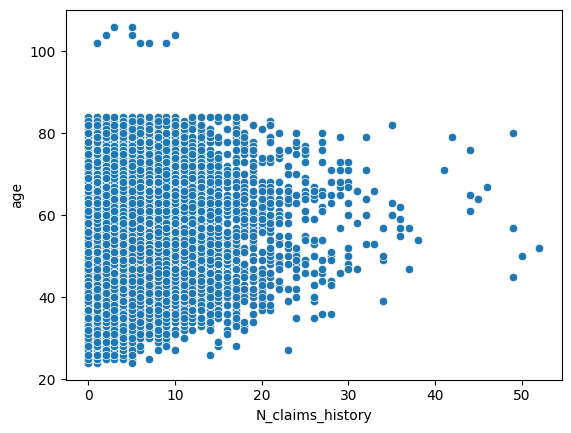

In [17]:
#Creating a scatter plot to show whether there is correlation between Age and the number of claims made historically
sns.scatterplot(data=car_df, x="N_claims_history", y="age")

This graph shows there is no real relationship between the two features

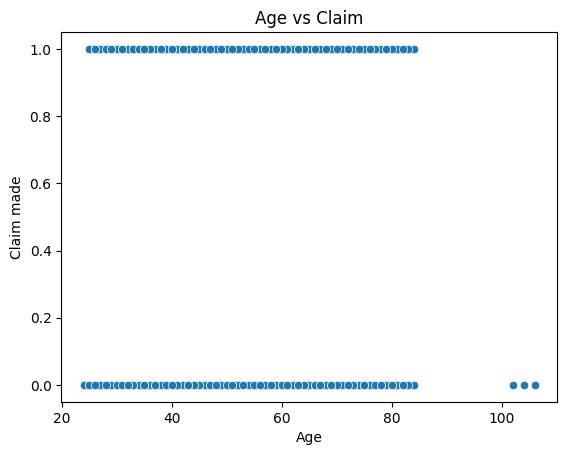

In [18]:
#Made scatter plots for both features individually compared to if a claim was made or not
sns.scatterplot(data=car_df, x='age', y='claim')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim made')
plt.show()

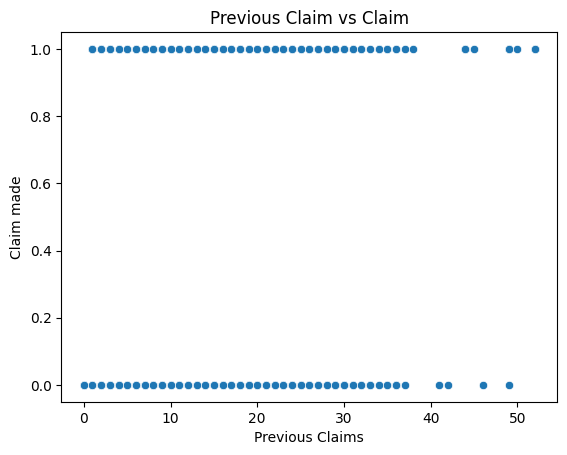

In [19]:
sns.scatterplot(data=car_df, x='N_claims_history', y='claim')
plt.title('Previous Claim vs Claim')
plt.xlabel('Previous Claims')
plt.ylabel('Claim made')
plt.show()

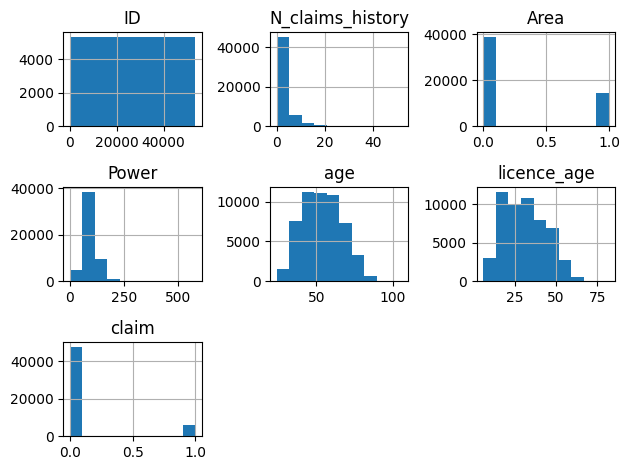

In [20]:
#Histogram on all feature variables
car_df.hist()
plt.tight_layout()  # Ensures better layout for plots
plt.show()

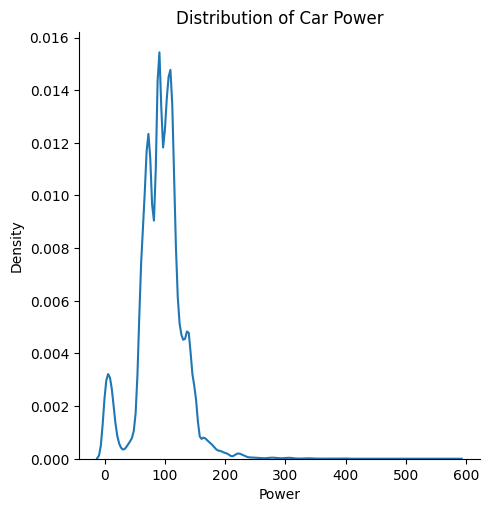

In [21]:
#Creating a distribtuion plot to understand the spread of car power within the dataset
sns.displot(data=car_df, x="Power",kind="kde")
plt.title('Distribution of Car Power')
plt.xlabel('Power')
plt.ylabel('Density')
plt.show()

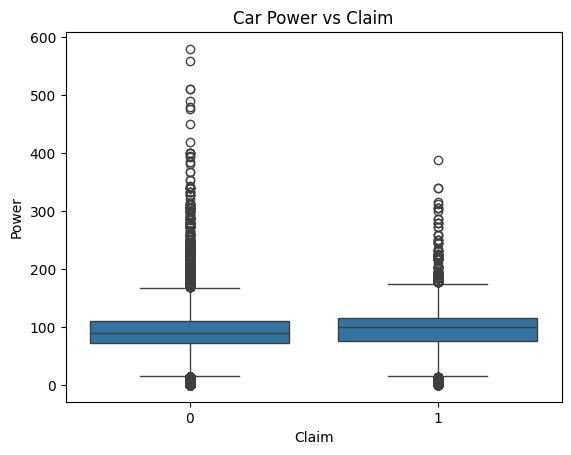

In [22]:
#Making a boxplot to visualise car power in comparison to whether or not a claim was made 
sns.boxplot(x='claim', y='Power', data=car_df)
plt.title('Car Power vs Claim')
plt.xlabel('Claim')
plt.ylabel('Power')
plt.show()

This shows higher powered cars are marginally more common in policies that have had a claim made against them.

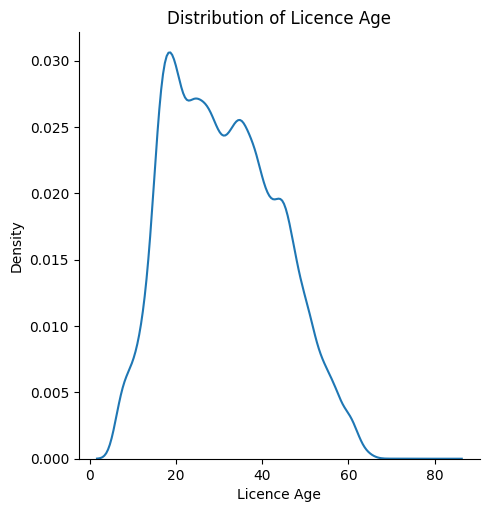

In [23]:
#Creating a distribtuion plot to understand the spread of licence age within the dataset
sns.displot(data=car_df, x="licence_age",kind="kde")
plt.title('Distribution of Licence Age')
plt.xlabel('Licence Age')
plt.ylabel('Density')
plt.show()

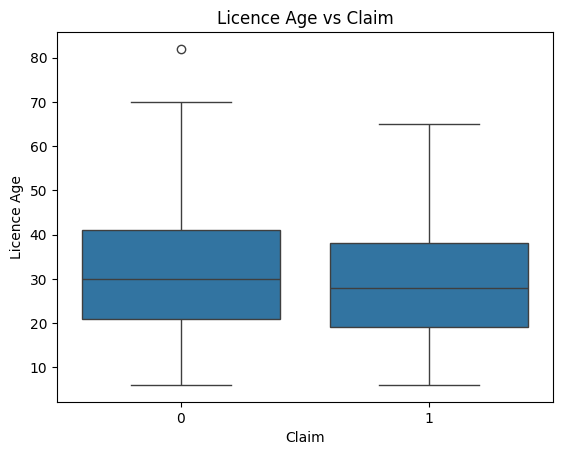

In [24]:
#Making a boxplot to visualise licence age in comparison to whether or not a claim was made 
sns.boxplot(x='claim', y='licence_age', data=car_df)
plt.title('Licence Age vs Claim')
plt.xlabel('Claim')
plt.ylabel('Licence Age')
plt.show()

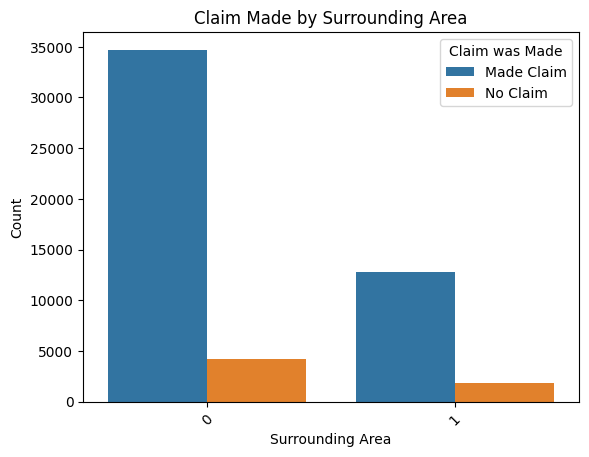

In [25]:
#Count plot made to compare surrounding area vs whether or not they made a claim. 0 suggests it is a rural area and 1 is urban.
sns.countplot(x='Area', hue='claim', data=car_df)

plt.title('Claim Made by Surrounding Area')
plt.xlabel('Surrounding Area')
plt.ylabel('Count')

plt.legend(title='Claim was Made', labels=['Made Claim', 'No Claim'])
plt.xticks(rotation=45)

plt.show()

In [26]:
#Create counts to understand proportion of claims based on surrounding areas
rural = car_df[car_df['Area'] == 0]
urban = car_df[car_df['Area'] == 1]
rural_claim = car_df[((car_df['Area'] == 0) & (car_df['claim'] == 1))]
urban_claim = car_df[((car_df['Area'] == 1) & (car_df['claim'] == 1))]

rural_prop = len(rural_claim)/len(rural) * 100
urban_prop = len(urban_claim)/len(urban) * 100

print(f"Percentage of rural area policies that made a claim: {rural_prop:.2f}%")
print(f"Percentage of urban area policies that made a claim: {urban_prop:.2f}%")

Percentage of rural area policies that made a claim: 10.72%
Percentage of urban area policies that made a claim: 12.20%


This shows proportions are fairly comparable with Urban areas making slightly more insurance claims

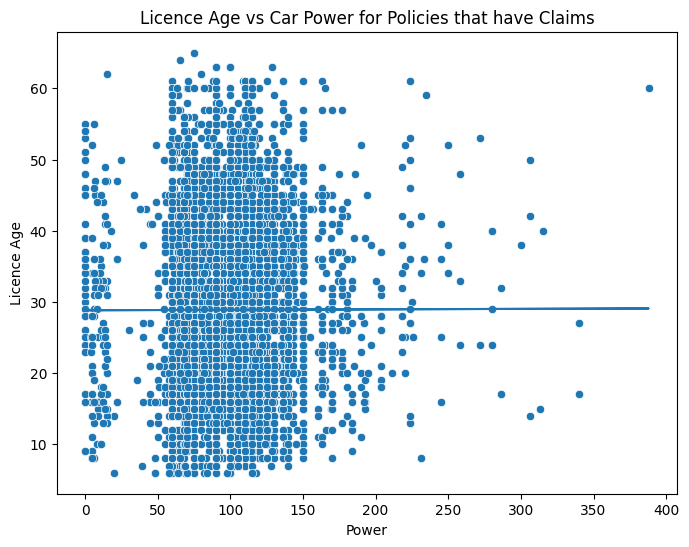

In [27]:
from sklearn.linear_model import LinearRegression

made_claim = car_df[car_df['claim'] == 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=made_claim, x='Power', y='licence_age')

model_claim = LinearRegression()
model_claim.fit(made_claim[['Power']], made_claim['licence_age'])
plt.plot(made_claim['Power'], model_claim.predict(made_claim[['Power']]))

plt.xlabel('Power')
plt.ylabel('Licence Age')
plt.title('Licence Age vs Car Power for Policies that have Claims')
plt.show()

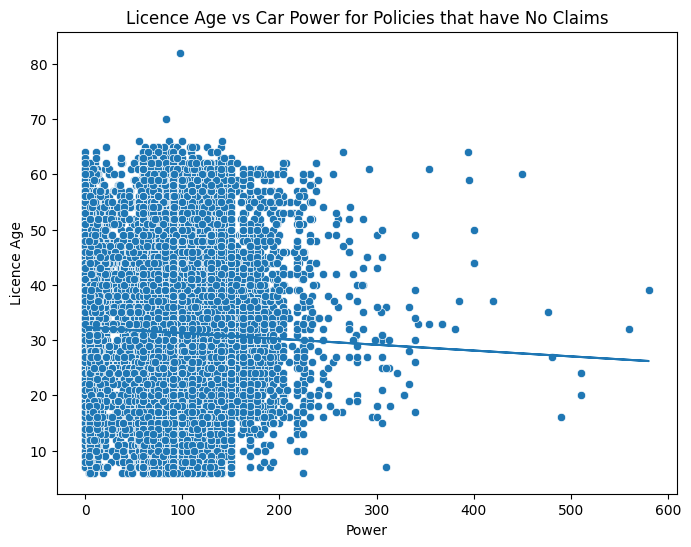

In [28]:
from sklearn.linear_model import LinearRegression

no_claim = car_df[car_df['claim'] == 0]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=no_claim, x='Power', y='licence_age')

model_claim = LinearRegression()
model_claim.fit(no_claim[['Power']], no_claim['licence_age'])
plt.plot(no_claim['Power'], model_claim.predict(no_claim[['Power']]))

plt.xlabel('Power')
plt.ylabel('Licence Age')
plt.title('Licence Age vs Car Power for Policies that have No Claims')
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = car_df[['N_claims_history','Area','Power','age','licence_age']]
y = car_df['claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

model_claim = LogisticRegression()
model_claim.fit(X_train, y_train)

probability = model_claim.predict_proba(X_test)
predicted_probability = probability[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_probability)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc}")

AUC-ROC: 0.7309974709079241


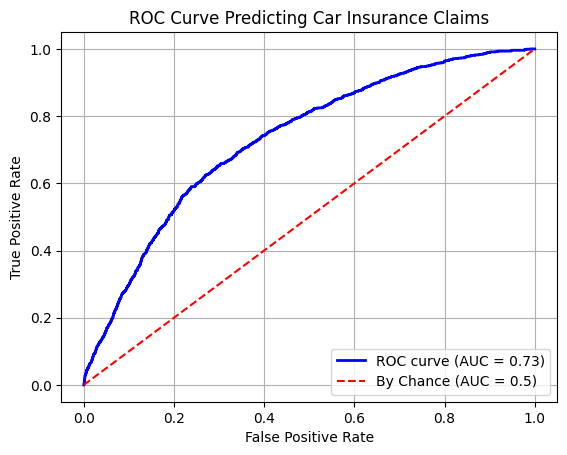

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_probability)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='By Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Predicting Car Insurance Claims')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()